<center><h1><bold>Classification of Wildfire Casuses</bold></h1></center>

# R4 - Baseline Training and Evaluation using Decision Trees

#### Importing necessary python libraries required for data wrangling
- <code>Pandas</code>: for data structutres and tools for effective data cleaning
- <code>sklearn</code>: open source machine learning library for python
- <code>Matplotlib</code>: allow for graphical representation of the data set features

From <code>sklearn</code> we import
- <code>DecisionTreeClassifier</code>: to make use of the decision tree algorithm
- <code>preprocessing</code>: to transform categorical features to numerical values for decision tree classifier
- <code>model_selection</code>: to split the data into training and test sets
- <code>metrics</code>: for the evaluation of the model performance

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
import sklearn.tree as tree
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


<h2>Downloading the Data</h2>
    To download the data, we will use pandas library to read it directly into a dataframe from a CSV file.

In [2]:
wildfire_data = pd.read_csv(r'C:\Users\Favour Sukat\OneDrive - Heriot-Watt University\SEMESTER 1(Septermber)\Data Mining and Machine Learning\group-coursework-bots-ahead\data\wildifire2.csv')
wildfire_data.head()

,Unnamed: 0,FIRE_DAY,FIRE_MONTH,Fire_Duration,FIRE_SIZE,STATE,LATITUDE,LONGITUDE,NWCG_GENERAL_CAUSE,NWCG_CAUSE_CLASSIFICATION
0,0,Wednesday,February,0,0.10,CA,40.036944,-121.005833,Power generation/transmission/distribution,Human
1,1,Wednesday,May,0,0.25,CA,38.933056,-120.404444,Natural,Natural
2,2,Monday,May,0,0.10,CA,38.984167,-120.735556,Debris and open burning,Human
3,3,Monday,June,5,0.10,CA,38.559167,-119.913333,Natural,Natural
4,4,Monday,June,5,0.10,CA,38.559167,-119.933056,Natural,Natural


<h2>Preprocessing</h2>
Selecting the features to be used in the classifier
<ul>
    <li> <b> X </b> as the <b> Feature Matrix </b> (data of <code>wildfire_data</code>) </li>
    <li> <b> Y </b> as the <b> response vector </b> (target) </li>
</ul>

The algorithm will be implemented without the feature <code>NWCG_GENERAL_CAUSE</code><br>
- We are excluding it because the feature contians our similar data to our target binary class which are the values <b>natural</b> and <b>human<b>

In [3]:
# excluding the target variable from our selection
X = wildfire_data[['FIRE_DAY', 'FIRE_MONTH', 'Fire_Duration', 'FIRE_SIZE', 'STATE', 'LATITUDE', 'LONGITUDE']].values
X[0:6]

array([['Wednesday', 'February', 0, 0.1, 'CA', 40.03694444,
        -121.00583333],
       ['Wednesday', 'May', 0, 0.25, 'CA', 38.93305556, -120.40444444],
       ['Monday', 'May', 0, 0.1, 'CA', 38.98416667, -120.73555556],
       ['Monday', 'June', 5, 0.1, 'CA', 38.55916667, -119.91333333],
       ['Monday', 'June', 5, 0.1, 'CA', 38.55916667, -119.93305556],
       ['Wednesday', 'June', 1, 0.1, 'CA', 38.63527778, -120.10361111]],
      dtype=object)

Some features in this dataset are categorical, such as **FIRE_DAY**, **FIRE_MONTH** and **STATE**. Sklearn Decision Trees does not handle categorical variables.
 - We will transform the 3 features into numerical data using the <code>LabelEncoder()</code> from sklearn's preprocessing

In [4]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
states = ['CA', 'NM', 'OR', 'NC', 'WY', 'WA', 'MT', 'UT', 'AZ', 'SD', 'NV',
       'ID', 'MN', 'SC', 'OK', 'CO', 'MO', 'NE', 'MI', 'KY', 'OH', 'IN',
       'VA', 'IL', 'TN', 'GA', 'AK', 'TX', 'ND', 'WV', 'WI', 'NH', 'PA',
       'AR', 'FL', 'MS', 'AL', 'ME', 'VT', 'LA', 'KS', 'MD', 'NJ', 'MA',
       'NY', 'HI', 'CT', 'PR', 'RI', 'IA', 'DE']

le_days = preprocessing.LabelEncoder()
le_month = preprocessing.LabelEncoder()
le_states = preprocessing.LabelEncoder()

# Fit the LabelEncoder to these categories
le_days.fit(days)
le_month.fit(months)
le_states.fit(states)

# Transform the column in the array X (e.g., column index 4)
X[:, 0] = le_days.transform(X[:, 0])
X[:, 1] = le_month.transform(X[:, 1])
X[:, 4] = le_states.transform(X[:, 4])

Viewing the array after the data has been trasformed

In [5]:
X[0:6]

array([[6, 3, 0, 0.1, 4, 40.03694444, -121.00583333],
       [6, 8, 0, 0.25, 4, 38.93305556, -120.40444444],
       [1, 8, 0, 0.1, 4, 38.98416667, -120.73555556],
       [1, 6, 5, 0.1, 4, 38.55916667, -119.91333333],
       [1, 6, 5, 0.1, 4, 38.55916667, -119.93305556],
       [6, 6, 1, 0.1, 4, 38.63527778, -120.10361111]], dtype=object)

#### Storing the target varible in Y

In [6]:
Y = wildfire_data['NWCG_CAUSE_CLASSIFICATION']
Y[0:6]

0      Human
1    Natural
2      Human
3    Natural
4    Natural
5    Natural
Name: NWCG_CAUSE_CLASSIFICATION, dtype: object

## Training and Testing
Now <code>train_test_split</code> will usually return 4 different parameters. We label them:<br>
X_train, X_test, Y_train, Y_test <br> <br>
The <code>train_test_split</code> will need the parameters: <br>
X, Y, test_size=0.3, and random_state=42. <br> <br>
- The <b>X</b> and <b>Y</b> are the arrays required before the split<br> 
- The <b>test_size</b> represents the ratio of the testing dataset; so 30% of the data will be used for testing<br>
- The <b>random_state</b> ensures that we obtain the same splits.
- We also use the <b>stratify</b> parameter to make sure that the data is evenly distributed

In [7]:
# stratify to ensure data is distributed evenly
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)

### We will look at the Training and Test sets to ensure that the dimensions match

In [8]:
print('Shape of X Train Set:', X_train.shape)
print('Shape of Y Train Set:', Y_train.shape)

Shape of X Train Set: (655704, 7)
Shape of Y Train Set: (655704,)


In [9]:
print('Shape of X Test Set:', X_test.shape)
print('Shape of Y Test Set:', Y_test.shape)

Shape of X Test Set: (281016, 7)
Shape of Y Test Set: (281016,)


## Modelling
### 1. Parameter Search Configuration
- We will use `RandomizedSearchCV` to systematically find the best parameters for our decision tree classifier
- The search will explore different combinations of:
  - **max_depth**: Controls tree depth (3-7 levels)
    - Too deep → risk of overfitting
    - Too shallow → risk of underfitting
  - **criterion**: Method for measuring quality of split
    - 'gini' → measures probability of incorrect classification
    - 'entropy' → measures information gain
  - **min_samples_split**: Minimum samples required to split node
  - **min_samples_leaf**: Minimum samples required in leaf nodes

In [10]:
# Create base classifier without preset parameters
base_tree = DecisionTreeClassifier()

# Define parameter grid for optimization
param_grid = {
    'max_depth': [3, 4, 5, 6, 7],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

### 2. Parameter Search Process
- Using `RandomizedSearchCV` to find optimal parameters through:
  - **10 iterations** of different parameter combinations
  - **5-fold cross-validation** to ensure robust parameter selection
  - Each parameter set is evaluated on different data splits to avoid selection bias

In [11]:
# Set up and run parameter search
search = RandomizedSearchCV(
    estimator=base_tree,
    param_distributions=param_grid,
    n_iter=10,                  
    cv=5,                       
    random_state=42
)

# Fit the search
search.fit(X_train, Y_train)

# Print results
print("Best parameters found:", search.best_params_)
print("Best cross-validation score:", search.best_score_)

Best parameters found: {'min_samples_split': 4, 'min_samples_leaf': 2, 'max_depth': 7, 'criterion': 'gini'}
Best cross-validation score: 0.8946277592565725


## Model Implementation

### 1. Creating Optimized Model
Using our discovered best parameters to create the decision tree classifier.

In [19]:
# Create final model with optimal parameters
decision_tree = DecisionTreeClassifier(
    max_depth=7,
    criterion='gini',
    min_samples_split=4,
    min_samples_leaf=2
)


#### Next, we will fit the data with the training feature matrix <b> X_train </b> and training  response vector <b> Y_train </b>

In [21]:
# Train the model
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=2, min_samples_split=4)

## Prediction
- Let's make some <b>predictions</b> on the testing dataset and store it into a variable called <code>fire_prediction</code>.

In [22]:
fire_prediction = decision_tree.predict(X_test)

#### Printing the prediction and the test data to visually compare results of the first 5 and last 5 values

In [24]:
print (fire_prediction [0:5])
print (Y_test [0:5])

['Human' 'Human' 'Human' 'Human' 'Human']
167511    Human
333524    Human
416014    Human
180646    Human
897540    Human
Name: NWCG_CAUSE_CLASSIFICATION, dtype: object


In [23]:
print (fire_prediction [-5:])
print (Y_test [-5:])

['Natural' 'Human' 'Human' 'Natural' 'Natural']
613183      Human
323399      Human
72214       Human
92804     Natural
74358     Natural
Name: NWCG_CAUSE_CLASSIFICATION, dtype: object


## Model Evaluation
- **Accuracy Classification Score**: Measures the proportion of correct predictions
  - In binary classification (Human/Natural), it shows how often our model is correct
  - However, with imbalanced classes, accuracy alone can be misleading

- **F1 Score**: Harmonic mean of precision and recall
  - Balances precision (avoiding false positives) and recall (avoiding false negatives)
  - Particularly important for imbalanced datasets like ours

- **Classification Report**: Provides detailed per-class performance metrics
  - Precision: Proportion of correct positive predictions
  - Recall: Proportion of actual positives correctly identified
  - Support: Number of samples for each class

In [25]:
accuracy = accuracy_score(Y_test, fire_prediction)
f1 = f1_score(Y_test, fire_prediction, average = 'weighted')
print("Accuracy = ", accuracy)
print("F1 Score = ", f1)
print("Classification Report : \n", classification_report(Y_test, fire_prediction))

Accuracy =  0.8949953027585618
F1 Score =  0.8899348953158803
Classification Report : 
               precision    recall  f1-score   support

       Human       0.92      0.96      0.94    234200
     Natural       0.73      0.58      0.65     46816

    accuracy                           0.89    281016
   macro avg       0.83      0.77      0.79    281016
weighted avg       0.89      0.89      0.89    281016



### Observations:
- The model performs generally very well in prediciting **human** causes. It shows excellent  <code>recall</code> and high <code>f1-score</code> indicating a balanced performance for Human causes. 
- It is not as accurate when predicting **natural** causes and has a really poor <code>recall</code>, indicating that it misses many natural fire predictions. It struggles a lot with the minority class as there is a lower F1-score

## Applying SMOTE to generate synthetic samples for the training data to balance the classes.

In [26]:
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

# Create and train model with SMOTE-applied data
final_tree_smote = DecisionTreeClassifier(
    max_depth=7,
    criterion='gini',
    min_samples_split=4,
    min_samples_leaf=2
)

# Fit the model
final_tree_smote.fit(X_train_smote, Y_train_smote)

# Make predictions
y_pred_smote = final_tree_smote.predict(X_test)

# Model Performance with SMOTE
print("\nModel Performance with SMOTE:")
print("Accuracy = ", accuracy_score(Y_test, y_pred_smote))
print("\nClassification Report: \n", classification_report(Y_test, y_pred_smote))


Model Performance with SMOTE:
Accuracy =  0.8652888091781251

Classification Report: 
               precision    recall  f1-score   support

       Human       0.96      0.88      0.92    234200
     Natural       0.57      0.80      0.67     46816

    accuracy                           0.87    281016
   macro avg       0.76      0.84      0.79    281016
weighted avg       0.89      0.87      0.87    281016



### The model after SMOTE provides a more balanced performance between the two classes, especially improving the recall for the "Natural" class.

## Importance Analysis
Understanding which features most influence our model's decisions can provide valuable insights about wildfire cause classification.

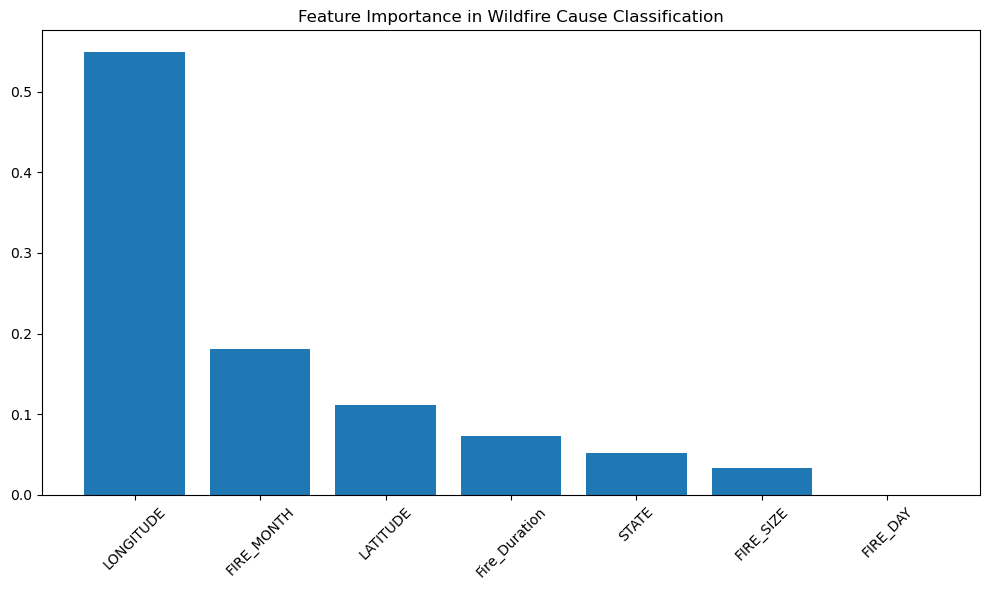

In [27]:
# Get feature importances
importances = final_tree_smote.feature_importances_
feature_names = ['FIRE_DAY', 'FIRE_MONTH', 'Fire_Duration', 'FIRE_SIZE', 
                 'STATE', 'LATITUDE', 'LONGITUDE']

# Create DataFrame for better visualization

feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=45)
plt.title('Feature Importance in Wildfire Cause Classification')
plt.tight_layout()
plt.show()

Since FIRE_DAY provided no importance to the model, we can remove it and improve our model performance.

In [30]:
# Remove FIRE_DAY (first column) from training and test sets
X_train_selected = X_train_smote[:, 1:]  # Keep all columns except the first one
X_test_selected = X_test[:, 1:]    # Keep all columns except the first one



# Fit the model
final_tree_smote.fit(X_train_selected, Y_train_smote)

# Make predictions
y_pred_selected = final_tree_smote.predict(X_test_selected)

# Print results
print("Model Performance with Selected Features:")
print("----------------------------------------")
print("Accuracy", accuracy_score(Y_test, y_pred_selected))
print("\nClassification Report:")
print(classification_report(Y_test, y_pred_selected))

Model Performance with Selected Features:
----------------------------------------
Accuracy 0.8653528624704643

Classification Report:
              precision    recall  f1-score   support

       Human       0.96      0.88      0.92    234200
     Natural       0.57      0.80      0.67     46816

    accuracy                           0.87    281016
   macro avg       0.76      0.84      0.79    281016
weighted avg       0.89      0.87      0.87    281016



### Key Finding
Removing FIRE_DAY had no impact on model performance, confirming that it was not contributing to the predictions. We've achieved the same performance with a simpler model.

## Visualisation
We'll visusalise what the tree looks like using <code>sklearn's</code> **tree** class along with <code>matplotlib</code>

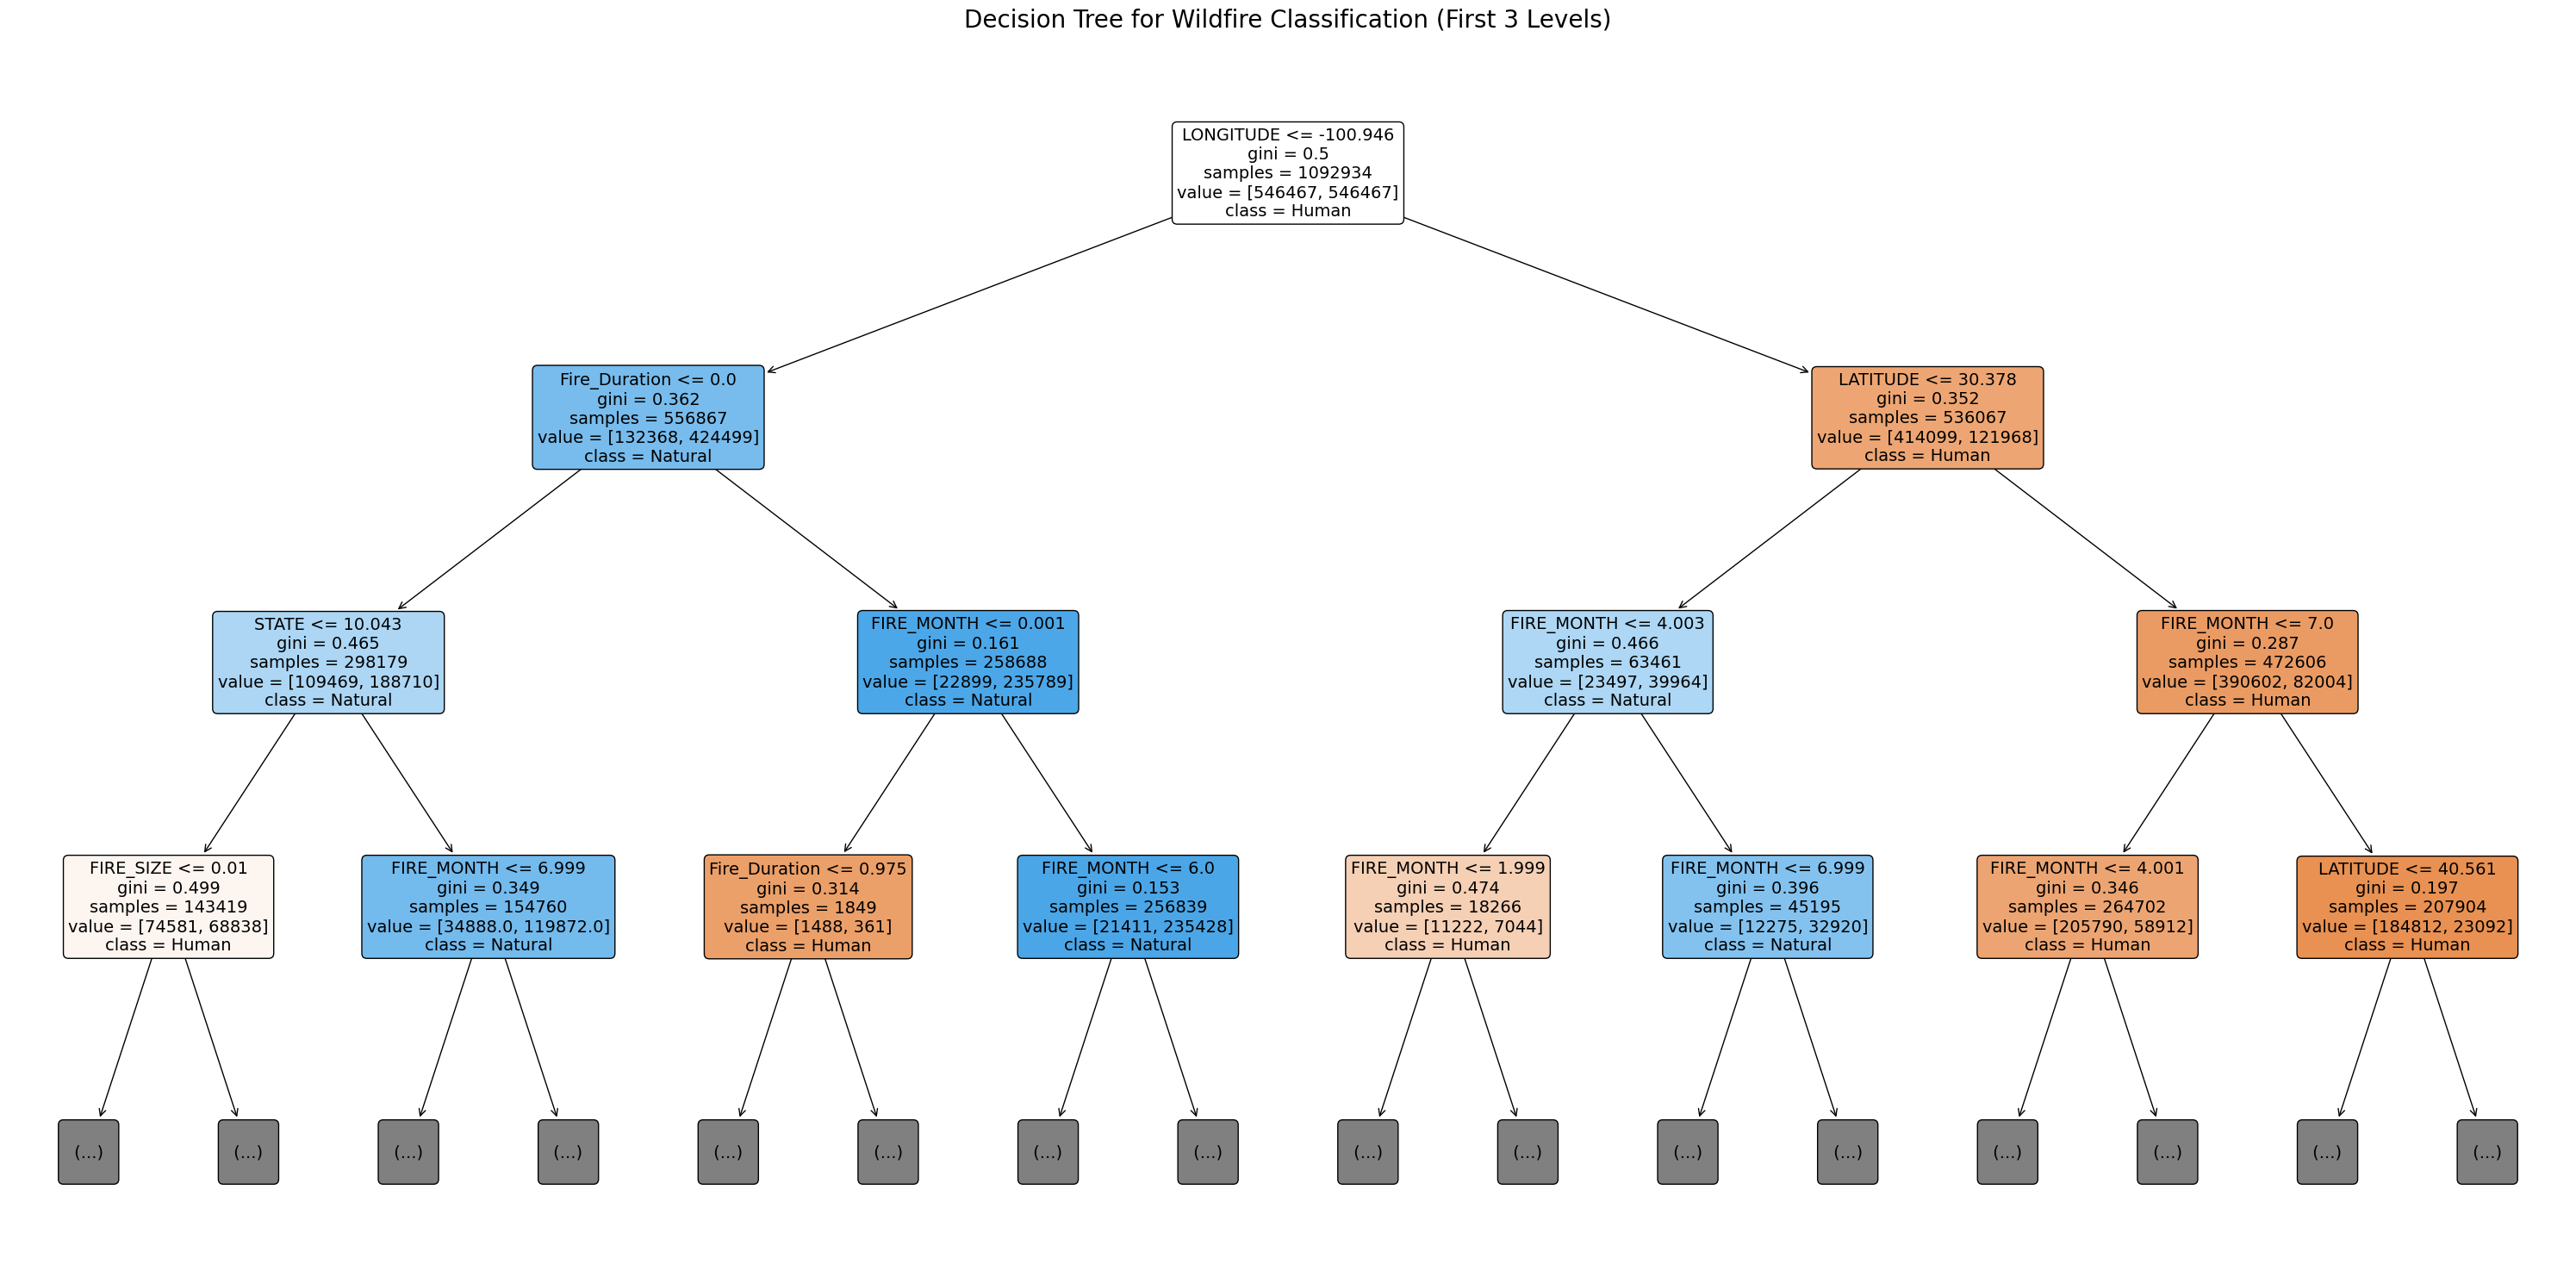

In [31]:
# Create larger figure with better resolution
plt.figure(figsize=(30, 15))
selected_features=['FIRE_MONTH', 'Fire_Duration', 'FIRE_SIZE', 
                 'STATE', 'LATITUDE', 'LONGITUDE']
# Plot tree with enhanced formatting
tree.plot_tree(final_tree_smote, 
               feature_names=selected_features,
               class_names=['Human', 'Natural'],
               filled=True,
               rounded=True,
               max_depth=3,  # Show only first 3 levels for clarity
               fontsize=14)  # Larger font size

plt.title('Decision Tree for Wildfire Classification (First 3 Levels)', fontsize=20, pad=20)
plt.tight_layout()
plt.show()

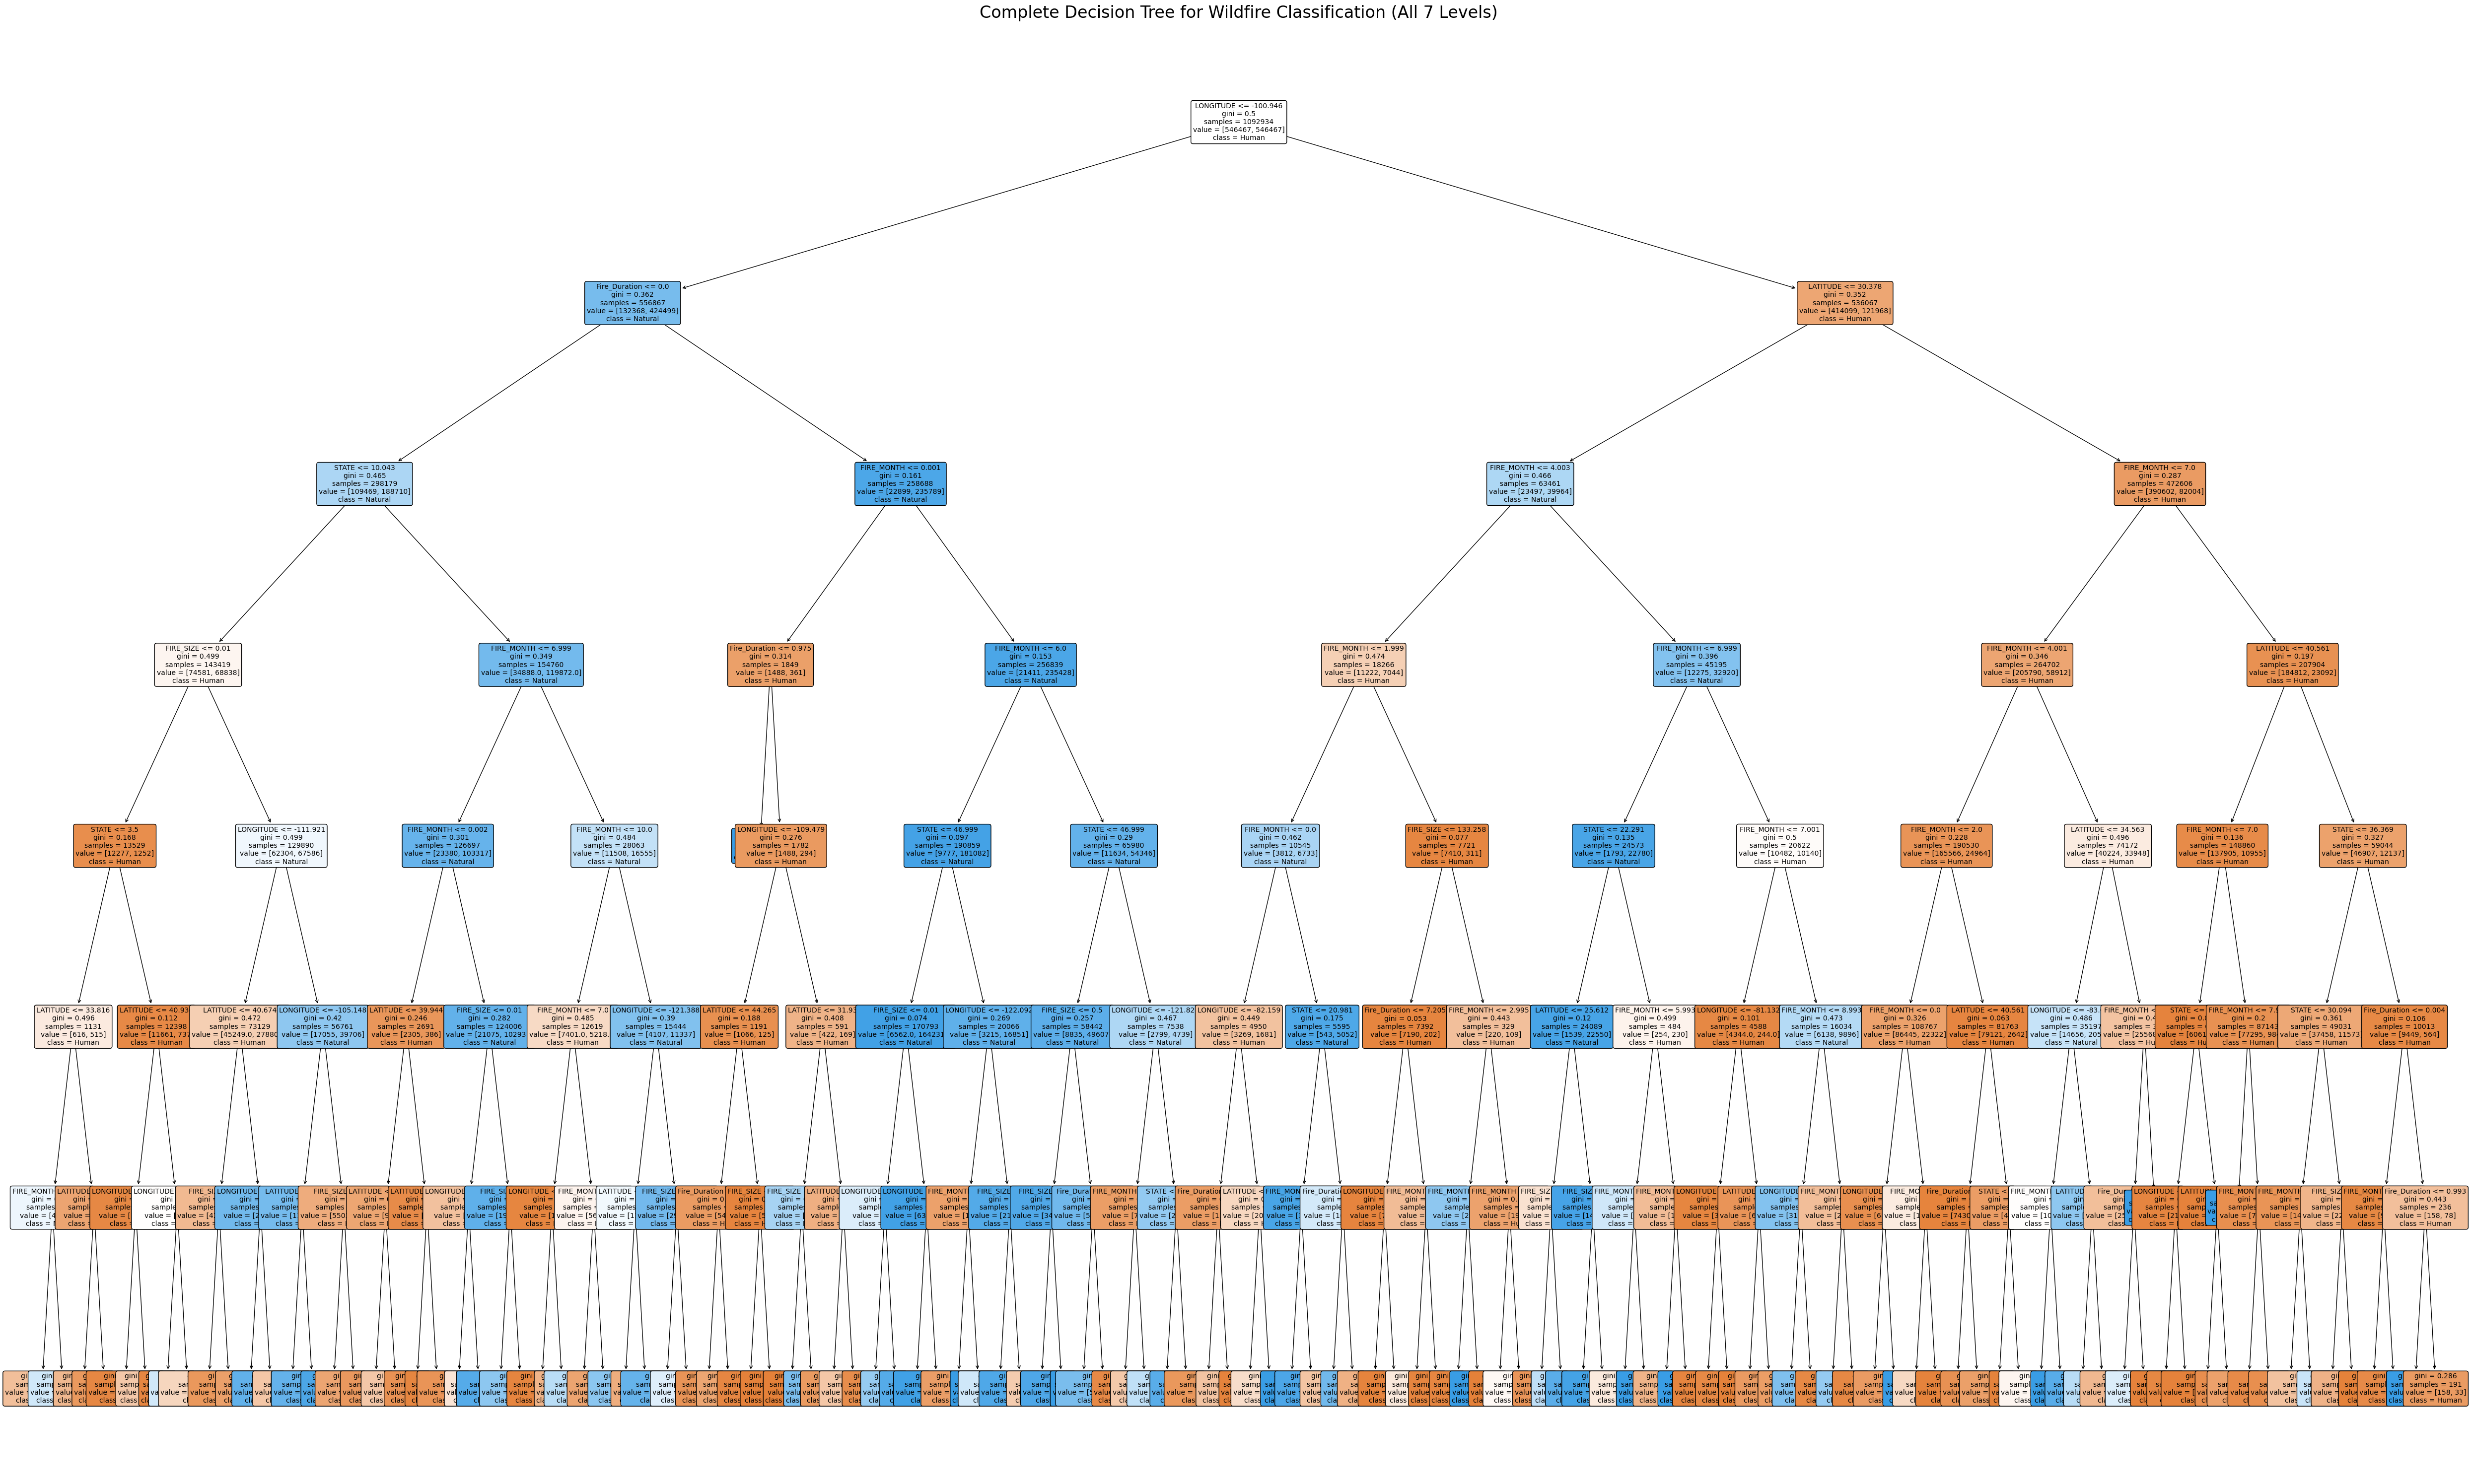

<Figure size 640x480 with 0 Axes>

In [32]:
# Create very large figure to accommodate full tree
plt.figure(figsize=(50, 30))  # Increased figure size for better readability

# Plot complete tree with enhanced formatting
tree.plot_tree(final_tree_smote, 
               feature_names=selected_features,
               class_names=['Human', 'Natural'],
               filled=True,
               rounded=True,
               max_depth=7,     # Show all 7 levels
               fontsize=10)     # Smaller font to fit all text

plt.title('Complete Decision Tree for Wildfire Classification (All 7 Levels)', 
          fontsize=24, 
          pad=20)
plt.tight_layout()
plt.show()
plt.savefig('full_decision_tree.png', dpi=300, bbox_inches='tight')